In [81]:
from scipy.spatial import distance
import matplotlib.pyplot as plt
import random

In [91]:
maxx = 100

class Person(object):
    def __init__(self,x,y,h,ID):
        self.x =  x
        self.y = y
        
        self.li = ['Normal','Infected', 'Recovered', 'Dead']
        self.health = self.li[h]
        self.id =  ID
        self.loc = [self.x,self.y]
        self.neigh = []
        
    def caldist(self,a1,a2):
        return distance.euclidean(a1,a2)
    
    def MySent(self):
        return ("I'm {0}. My health condition is {1} and I'm located at {2}".format(self.id,
                                                                                        self.health,
                                                                                        self.loc))
  
    def loc1(self):
#    def loc(self):
        return self.loc

x_vals = []
for i in range(maxx):
    a = random.randint(0,maxx)
    x_vals.append(a)

y_vals = []
for i in range(maxx):
    a = random.randint(0,maxx)
    y_vals.append(a)
    
    
# creating people
## Person (x = x_coordinate, y = y_coordinate, h = health[0,1,2,3], ID = some no)
people = []
for i in range(maxx):
    people.append(Person(x_vals[i], y_vals[i], random.randint(0,3), i))


    
radius = 10

def plotting():
    l_normal_x = []
    l_normal_y = []

    l_infec_x = []
    l_infec_y = []

    l_recov_x = []
    l_recov_y = []

    l_dead_x = []
    l_dead_y = []


    for i in range(maxx):
        if people[i].health == 'Normal': # normal
            l_normal_x.append(people[i].x)
            l_normal_y.append(people[i].y)

        elif people[i].health == 'Infected': # infected
            l_infec_x.append(people[i].x)
            l_infec_y.append(people[i].y)

        elif people[i].health == 'Recovered': # recovered 
            l_recov_x.append(people[i].x)
            l_recov_y.append(people[i].y)

        elif people[i].health == 'Dead': # dead 
            l_dead_x.append(people[i].x)
            l_dead_y.append(people[i].y)
            
    n_plot = plt.scatter(l_normal_x,l_normal_y,marker='o', color='green')
    i_plot =  plt.scatter(l_infec_x,l_infec_y,marker='*', color='red')
    r_plot = plt.scatter(l_recov_x,l_recov_y,marker='o', color='blue')
    d_plot = plt.scatter(l_dead_x,l_dead_y,marker='*', color='black', )
    plt.legend((n_plot,i_plot,r_plot, d_plot), ('Normal', 'Infected', 'Recovered', 'Dead'), loc = 0)
    
    
# Calculating distances

def calc():
    for i in range(maxx):
        for j in range(maxx):
            res = people[i].caldist(people[i].loc, people[j].loc)
            #print('dist of ' + str( people[i].id) + ' to ' + str(people[j].id) + ' is ' + str(res))
            if res <= radius:
                people[i].neigh.append(people[j].id)

            if people[i].health == 'Infected' and people[j].health == 'Normal' and res <= radius :
                people[j].health = 'Infected'


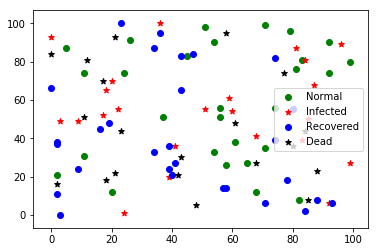

In [92]:
plotting()

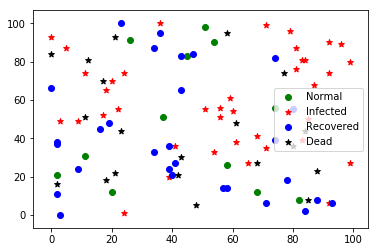

In [93]:
calc()
plotting()

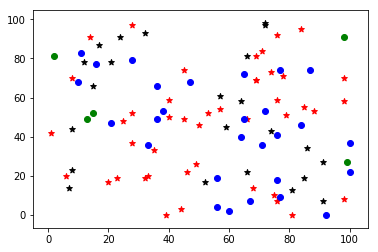

In [87]:
calc()
plotting()

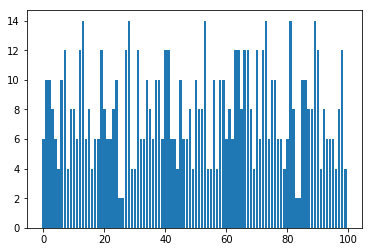

In [88]:
list1 = []
h =[]
for i in range(maxx):
    list1.append(people[i].id)
    

for i in people:
    h.append(len(i.neigh))

plt.bar(list1, h);